# 1. K-means 알고리즘 


In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
irisDF=pd.DataFrame(data=iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


#### 붓꽃 데이터 세트를 3개의 그룹으로 군집화

In [4]:
kmeans=KMeans(n_clusters=3, init='k-means++',max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [6]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [7]:
irisDF['target']=iris.target
irisDF['cluster']=kmeans.labels_

# target값과 cluster값 개수 비교
iris_result=irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

# target 0 = cluster 1
# 1 = 0, 2 = 2

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


#### 군집화 시각화하기


In [10]:
from sklearn.decomposition import PCA
# 4개의 속성을 2개로 차원 축소
pca=PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

# x, y 좌표로 개별 데이터를 표현
irisDF['pca_x']=pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:,1]
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


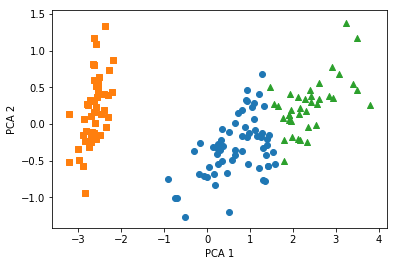

In [14]:
# 각 클러스터에 해당하는 index 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 각 클러스터에 해당하는 index로 각 cluster레벨의 pca_x, pca_y값 추출
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'],y=irisDF.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'],y=irisDF.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'],y=irisDF.loc[marker2_ind,'pca_y'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

### 1- 4. 군집화 알고리즘 테스트를 위한 데이터 생성
#### 1) make_blobs()
- make_blobs()로 만든 피처 데이터 세트의 군집화 분포 확인

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y=make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [21]:
import pandas as pd
clusterDF=pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


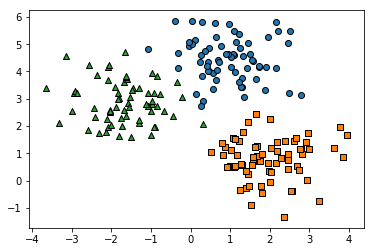

In [22]:
target_list = np.unique(y)  # array([0, 1, 2])

markers=['o', 's','^','P','D','H','X']

# target별로 marker 지정하고, scatter plot 그리기
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'],y=target_cluster['ftr2'],edgecolor='k',marker=markers[target])

plt.show()

- Kmeans 군집화를 수행한 뒤 군집별로 시작화 하기.

In [28]:
# X데이터 k-means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels
clusterDF.head(3)

,ftr1,ftr2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0


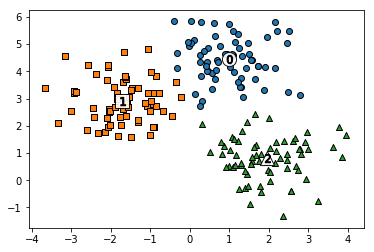

In [30]:
# 각 클러스터의 중심 위치 추출 (중심위치 좌표 시각화를 위해서)
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o','s','^','P','D','H','x']

# label 유형별로  반복하면서
for label in unique_labels:
    # scatter plot 그리기
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'],edgecolor='k',marker=markers[label])
    
    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='white',
               alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',edgecolor='k',
               marker='$%d$' % label)

plt.show()

In [31]:
# target과 cluster 매핑 결과 확인
# 대부분 잘 매핑된 것을 볼 수 있다.

print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


- make_blobs()의 cluster_std 파라미터로 데이터의 분포도 조절하기.
* cluster_std 가 작을수록 군집 중심에 데이터가 모여 있고, 클수록 데이터가 퍼져있다

## 2. 군집평가 
### 4. 실루엣 

In [38]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 metrc값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(data=iris.data,columns=feature_names)
kmeans=KMeans(n_clusters=3, init='k-means++',max_iter=300, random_state=0).fit(irisDF)

irisDF['cluster']=kmeans.labels_
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


- Silhouette_sample(데이터 셋, 군집 레이블) : 개별 데이터의 실루엣 계수
- silhouette_score: 모든 데이터의 실루엣 계수값을 평균

In [39]:
# iris의 모든 개별 데이터에 실루엣 계수값을 구함
score_samples=silhouette_samples(iris.data,irisDF['cluster'])

irisDF['silhouette_coeff']=score_samples
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [41]:
# silhouette_score: 모든 데이터의 실루엣 계수값을 평균
average_score=silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

# 군집별 실루엣 스코어 평균
irisDF.groupby('cluster')['silhouette_coeff'].mean()

붓꽃 데이터셋 Silhouette Analysis Score:0.553


cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

- 좋은 군집화는 Silhouette_score 값이 0 ~ 1 사이의 값을 갖고, 1에 가까울수록 좋음.
- 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함

### 실루엣 시각화
- visualize_silhouette 함수: 군집 개수를 변화시키면서 K-평균 군집을 수행했을 때 
    개별 군집별 평균 실루엣 계수 값을 시각화해서 군집의 개수를 정하는 데 도움을 줌


In [42]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트의 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        # 실루엣 스코어 (평균)
        sil_avg = silhouette_score(X_features, cluster_labels)
        # 모든 개별 데이터 실루엣 계수값 
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


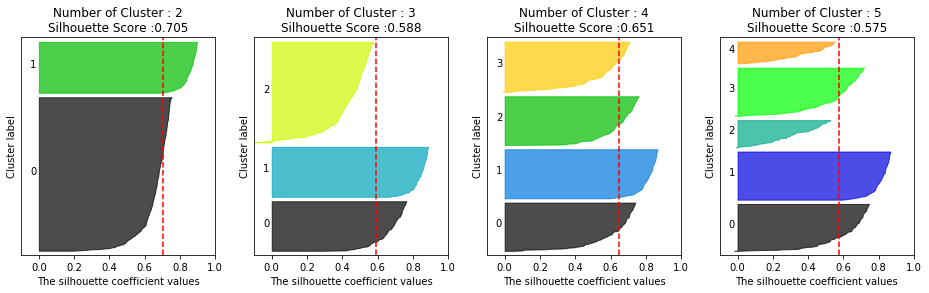

In [43]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)   # center_box: center값을 -10~10 사이로 지정

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

#### 4개가 가장 이상적인 군집 개수

- cluster 개수가 2개일 경우: 0번 군집에서 반 이상의 데이터가 평균을 넘지 못함.
- cluster 3 : 2번 군집에서 대부분의 데이터가 평균을 넘지 못함.
- cluster 4 : 평균 실루엣 계수 값이 작지만 개별 군집의 평균 실루엣 계수 값이 비교적 균일하게 위치


Second best를 고려하기
- 일반적으로 2개의 군집으로 나눴을 때, 평균 실루엣(실루엣 스코어)가 제일 높게 나온다.
- 하지만 이는 적절하지 않을 때가 많으므로, Second best를 고려해서 선택하는 것이 좋다. (이 경우에는 4개)


#### 군집평가 실습  (붓꽃 데이터)

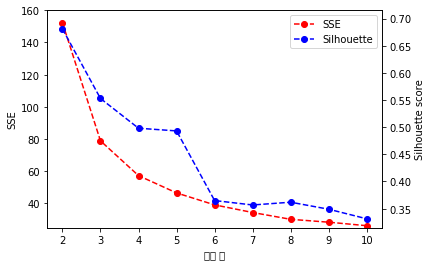

In [50]:
wss=[]
sis=[]

for k in range(2,11):
    kmeans=KMeans(n_clusters=k, random_state=0)
    kmeans.fit(iris.data)
    wss=np.append(wss, kmeans.inertia_)
    sis=np.append(sis, silhouette_score(iris.data, kmeans.labels_))

flg,ax1=plt.subplots()
ax2=ax1.twinx()

line1=ax1.plot(np.arange(2,11),wss,'ro--',label='SSE')
line2=ax2.plot(np.arange(2,11),sis,'bo--',label='Silhouette')

ax1.set_ylim(wss.min()*0.95, wss.max()*1.05)
ax2.set_ylim(sis.min()*0.95, sis.max()*1.05)

ax1.set_xlabel('군집 수')
ax1.set_ylabel('SSE')
ax2.set_ylabel('Silhouette score')

lines=line1+line2
labels=[l.get_label() for l in lines]

plt.legend(lines, labels)
plt.show()


# SSE와 Silhouette score 그래프를 바탕으로 Elbow 기법을 활용하면
# 붓꽃 데이터의 최적 군집 범위는 2, 3, 4, 5로 정함

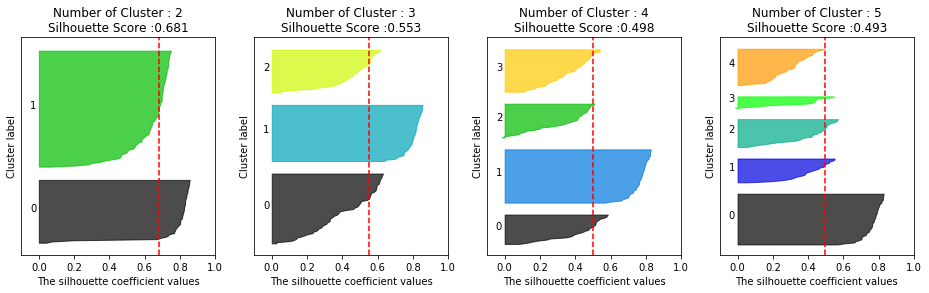

In [53]:
from sklearn.datasets import load_iris
iris=load_iris()
visualize_silhouette([2,3,4,5], iris.data)

# 군집 개수가 2개일 때 가장 최적. 